# Using Bayesian theory to improve reconstruction
First, let's go over some theory. In Bayesian formalism, the way to think about solving the reconstruction problem is to say that we are looking for the reconstruction $A$ that is maximally likely to produce the data (images) $X$. Or in mathematics:
<a id='equation_1'></a>
$
\begin{equation}
\underset{A}{\mathrm{arg\,max}} \quad P(X | A) \tag 1
\end{equation}
$
We call $P(X|A)$ the likelihood. We can write down an expression for the likelihood by looking at the image formation model we described in the main exercise:
<a id='equation_2'></a>
$
\begin{equation}
X_i = R^{\theta_i}A + \sigma G_i \tag 2
\end{equation}
$
which gives us a likelihood function:
<a id='equation_3'></a>
$
\begin{equation}
P(X_i|A, \theta_i) = \frac{1}{(\sqrt{2\pi}\sigma)^J} \exp{\frac{-\lVert X_i-A \rVert^2}{2\sigma^2}} \tag 3
\end{equation}
$
Note that the likelihood in the equation above depends on the unknown parameter $\theta$. In order for us to get to $P(X_i|A)$ we need to integrate out the unknown parameter $\theta_i$:
<a id='equation_4'></a>
$
\begin{equation}
P(X_i|A) = \int P(X_i|A, \theta_i)P(\theta_i|A)d\theta
\end{equation}
$
We can assume that $\theta$ is uniformly distributed. In that case $P(\theta_i|A)$ is uniform and we can ignore it. (this is indeed true. This is how we generated the data. If this was not know, we could incorporate some prior information about the distribution $P(\theta_i|A)$ here).

Now we want to estimate $A$ from the likelihood, but we don't know $\theta_i$. 




In [117]:
# imports
import numpy as np
from scipy import stats, ndimage
import matplotlib.pyplot as plt
from shared.singleparticle import make_letter
from shared.useful_functions import *
from tqdm import tqdm

In [165]:
# new helpful functions
def log_likelihood(image, reference, sigma):
    """
    Compute the log likelihood of an image given a reference image and a
    standard deviation.
    """
    z = np.sum((image - reference)**2)
    return -0.5*z/sigma**2


## make a data set
Now let's make a data set to try our Bayesian algorithm on

C:\Users\mjoosten1\AppData\Local\Temp\ipykernel_12956\401430632.py:6: DeprecationWarning: Please use `rotate` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  image_rotated = ndimage.interpolation.rotate(im, angle, reshape=False)


(600, 128, 128)


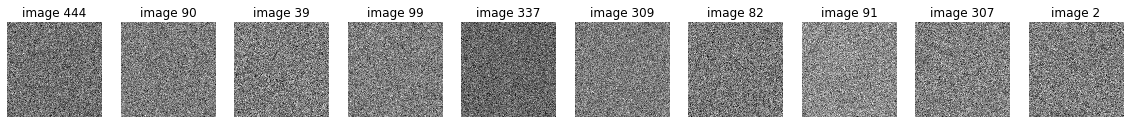

In [216]:
N = 600; sigma = 100
im = make_letter("Y", size=128)
true_angles = np.random.uniform(0, 360, N) # these are the true angles of the particles
images_stack = []
for angle in true_angles:
    image_rotated = ndimage.interpolation.rotate(im, angle, reshape=False)
    image_rotated_noisy = image_rotated + sigma * np.random.randn(*im.shape)
    images_stack.append(image_rotated_noisy)
images_stack = np.array(images_stack)
print(images_stack.shape)

fig, ax = plt.subplots(1, 10, figsize=(20, 10))
for ii, i in enumerate(np.random.randint(0, images_stack.shape[0], 10)):
    ax[ii].imshow(images_stack[i], cmap="gray", interpolation="none", origin="lower")
    ax[ii].axis("off")
    ax[ii].set_title("image {}".format(i))

## Example of log-likelihood
Let's have a quick look at what the log-likelihood looks like for one of the images. Try increasing $\sigma$ and look at how the peak broadens and we become less sure of the true rotation angle from the likelihood. The broader the peak, the less confident we are in our estimated rotation.

C:\Users\mjoosten1\AppData\Local\Temp\ipykernel_12956\1829935333.py:8: DeprecationWarning: Please use `rotate` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  image_rotated = ndimage.interpolation.rotate(reference, angle, reshape=False)


(-0.5, 127.5, -0.5, 127.5)

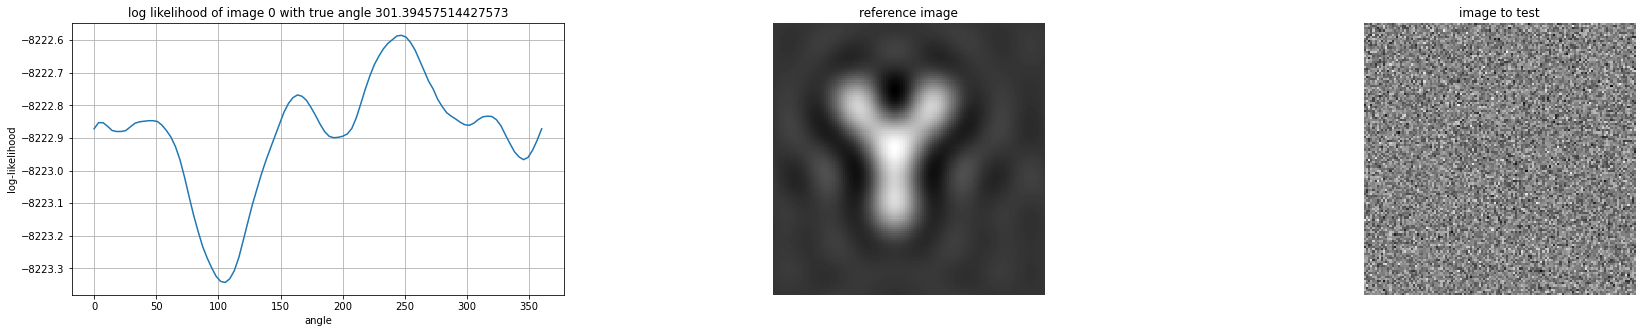

In [217]:
# example of computing the log likelihood of a single image
image_to_test = images_stack[0]
reference = make_letter("Y", size=128)
reference = low_pass_filter_image(reference, cutoff=25)

log_likelihood_list = []
for angle in np.linspace(0, 360, 100):
    image_rotated = ndimage.interpolation.rotate(reference, angle, reshape=False)
    log_likelihood_image = log_likelihood(image_rotated, image_to_test, sigma)
    log_likelihood_list.append(log_likelihood_image)

fig, ax = plt.subplots(1,3, figsize=(30,5))
ax[0].plot(np.linspace(0, 360, 100), log_likelihood_list)
ax[0].grid()
ax[0].set(xlabel="angle", ylabel="log-likelihood", title="log likelihood of image 0 with true angle {true_angle}".format(true_angle=true_angles[0]))
ax[1].imshow(reference, cmap="gray", interpolation="none", origin="lower")
ax[1].set(title="reference image")
ax[1].axis("off")
ax[2].imshow(image_to_test, cmap="gray", interpolation="none", origin="lower")
ax[2].set(title="image to test")
ax[2].axis("off")


## Reconstruction with least squares algorithm
Let's first see how well the old code does at reconstructing this data. Paste your algorithm below and use it to make a reconstruction. Don't copy the helper functions, they are already loaded in of you.

In [218]:
# copy your code here


# Task: write your Bayesian algorithm
Now update your algorithm to make use of the log-likelihood. There are two things that need to be done. The first is that you need to compute the log-likelihood for each image against the rotated references. The second is that this log-likelihood should be saved (entirely, not just the maximum value) and in the reconstruction you add up the contribution to the final image $A$ from each rotated input image $X$, weighted by the likelihood for that angle.

In the end, show how well your maximum likelihood algorithm works on very noisy data. When does it work better?

In [ ]:
# your updated algorithm
